In [1]:
import torch
from torch import nn

import sys
import math
import collections

# sys.path.append(".")
sys.path.append("..")

import d2lzh_pytorch.torch as d2l

# 导入工具类
from d2lzh_pytorch import myUtils

# 导入数据
from d2lzh_pytorch.nlp.load_data.load_wiki import load_data_wiki
from d2lzh_pytorch.nlp.load_data.load_ptb import load_data_ptb

# 导入模型
from d2lzh_pytorch.nlp.model.BERT_model import get_BERT_model

# 训练导入
from d2lzh_pytorch.nlp.train_model.train_bert import train_bert


In [9]:
batch_size = 512
max_len = 64


# 加载数据
train_iter, vocab = load_data_wiki(batch_size, max_len)

In [5]:
# 模型
net = get_BERT_model()

In [14]:
# net

In [6]:
loss = nn.CrossEntropyLoss()

In [7]:
# GPU
devices = myUtils.try_all_gpus()

ValueError: not enough values to unpack (expected 7, got 4)

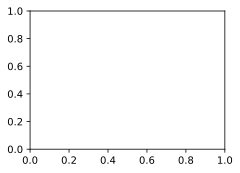

In [8]:
num_steps = 300

# 训练
train_bert(train_iter,
           net, 
           loss, 
           len(vocab), 
           devices, 
           num_steps)   

In [12]:
# 保存模型
net = net.to("cpu")

import datetime
str_time = str(datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S"))
save_path = 'pretrain_BERT_%s.pt' % str_time
torch.save(net, save_path)  # 全保存 39M
print("训练完毕, 模型 %s 已保存至当前路径" % save_path)

训练完毕, 模型 pretrain_BERT_2023-06-28_23-31-50.pt 已保存至当前路径
